# Final Project - Machine Learning 2024/25

# Preprocessing the data 

### Load packages and data

In [92]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import statsmodels.api as sm
import random
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



In [93]:
# read data 
data = pd.read_csv("data/CVD_cleaned.csv")


### Getting to know the data - Summary statistics

General_Health
Very Good    0.357434
Good         0.308767
Excellent    0.181167
Fair         0.115945
Poor         0.036687
Name: proportion, dtype: float64
Checkup
Within the past year       0.775030
Within the past 2 years    0.120487
Within the past 5 years    0.056473
5 or more years ago        0.043454
Never                      0.004556
Name: proportion, dtype: float64
Exercise
Yes    0.775062
No     0.224938
Name: proportion, dtype: float64
Heart_Disease
No     0.91915
Yes    0.08085
Name: proportion, dtype: float64
Skin_Cancer
No     0.902886
Yes    0.097114
Name: proportion, dtype: float64
Other_Cancer
No     0.903262
Yes    0.096738
Name: proportion, dtype: float64
Depression
No     0.799578
Yes    0.200422
Name: proportion, dtype: float64
Diabetes
No                                            0.839040
Yes                                           0.130065
No, pre-diabetes or borderline diabetes       0.022328
Yes, but female told only during pregnancy    0.008567
Name: prop

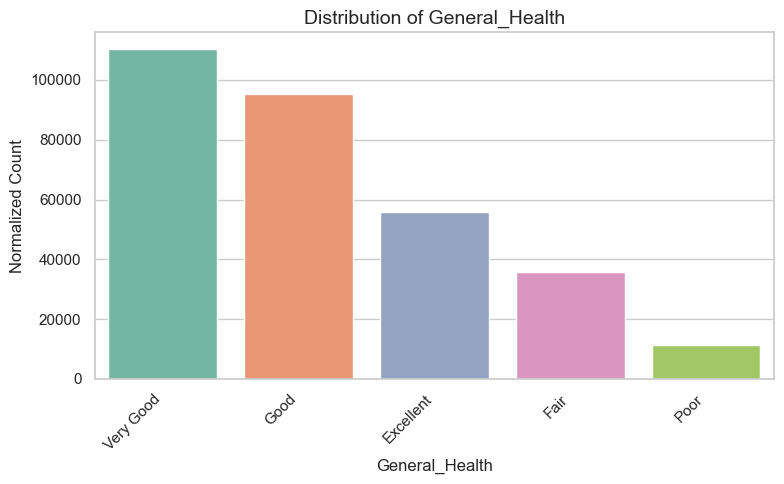

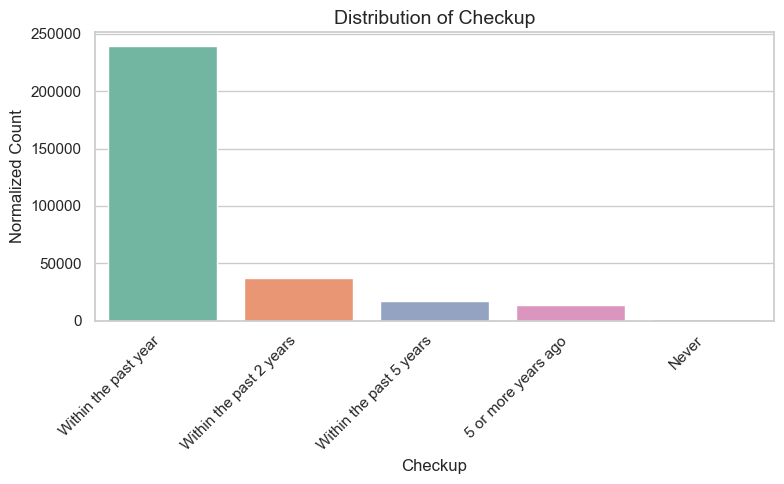

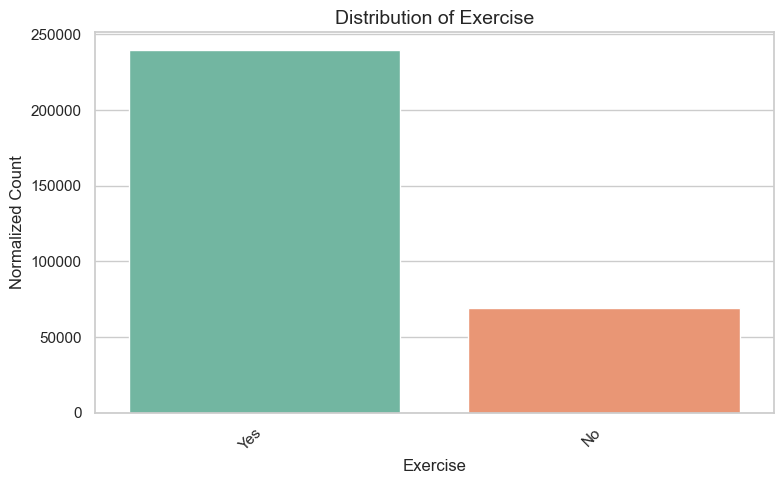

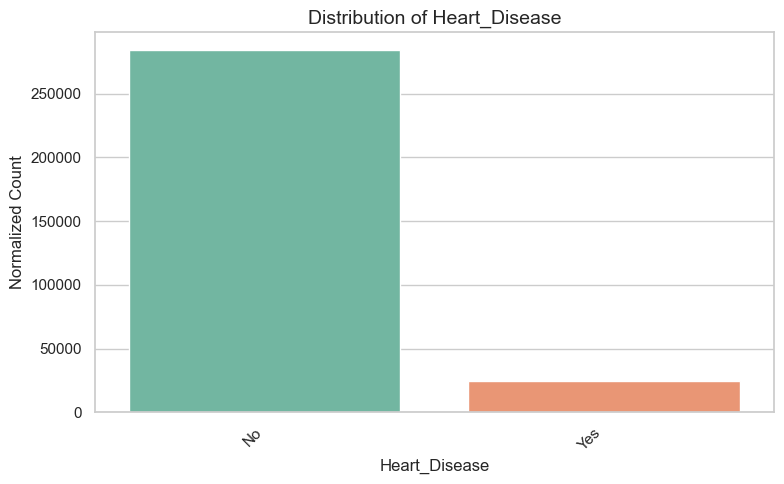

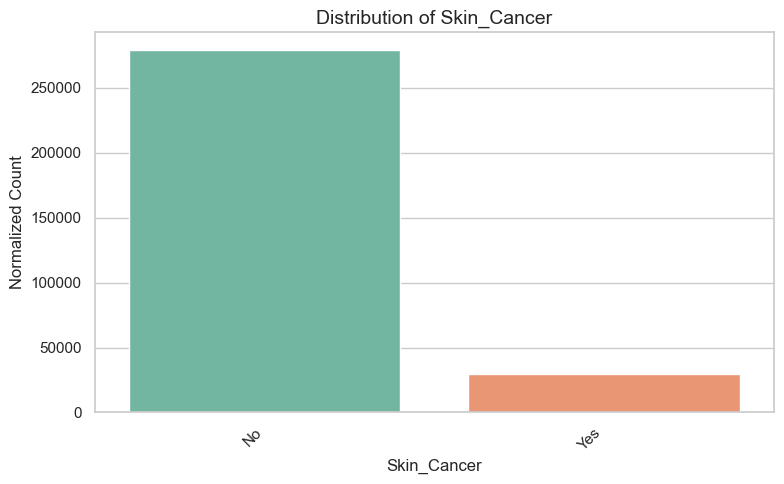

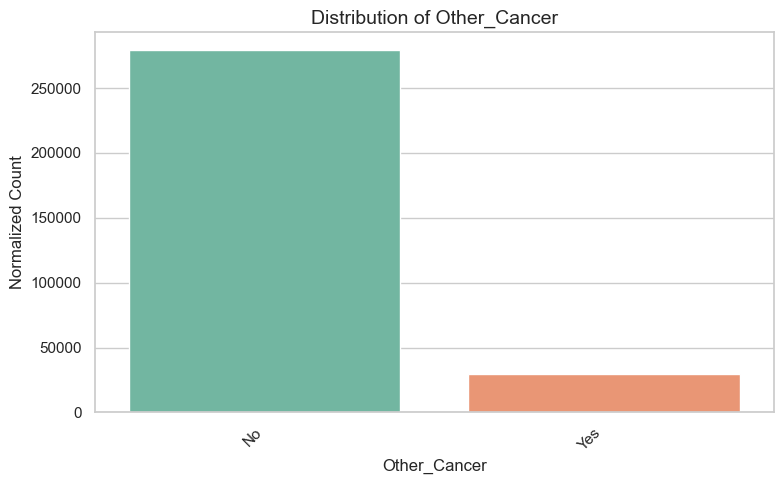

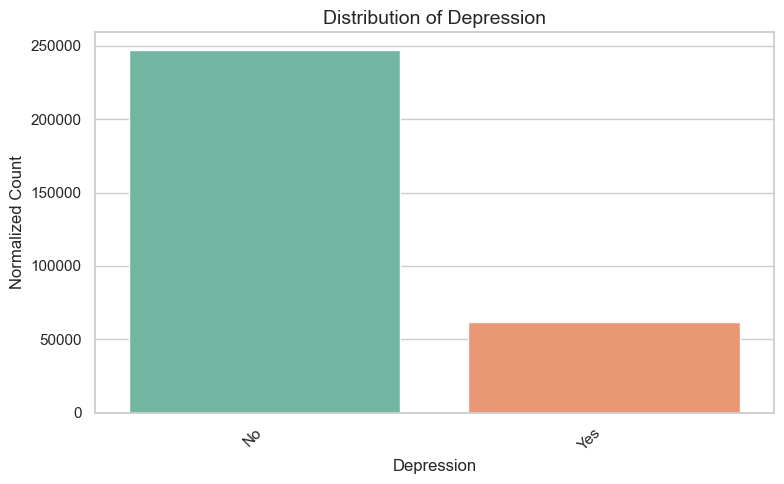

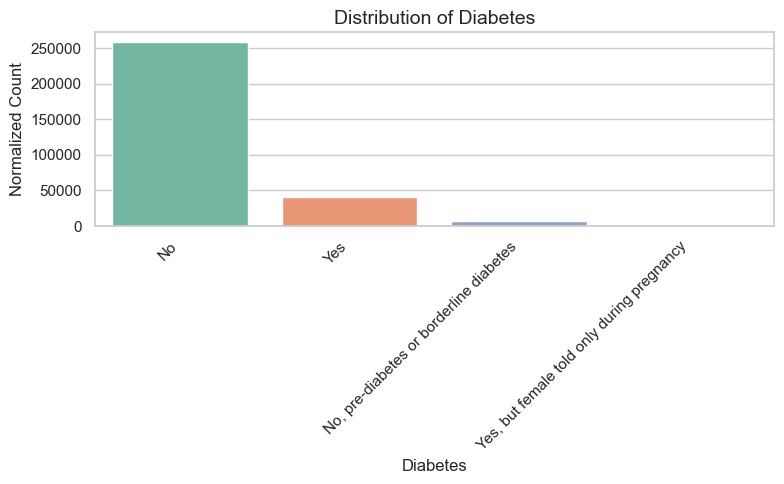

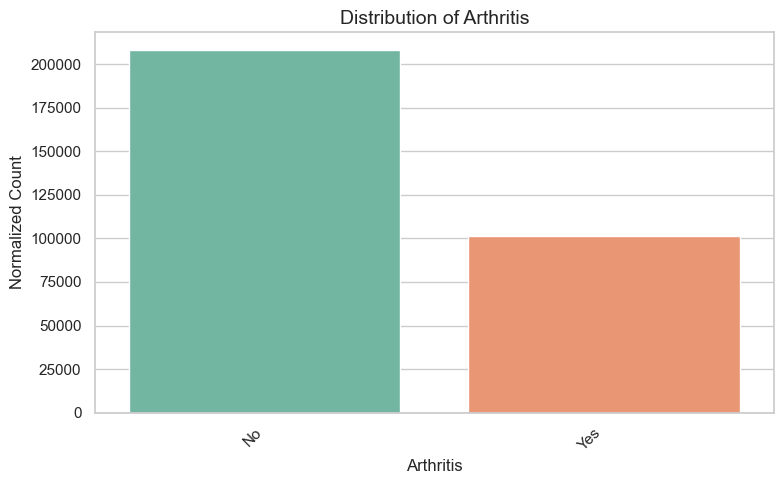

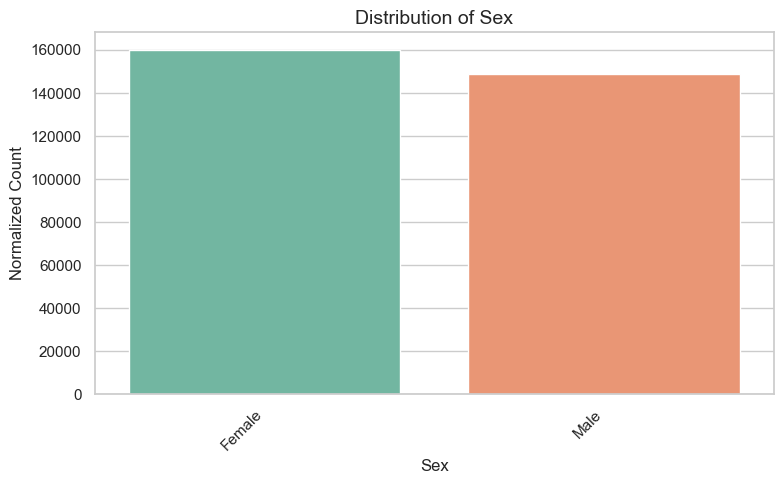

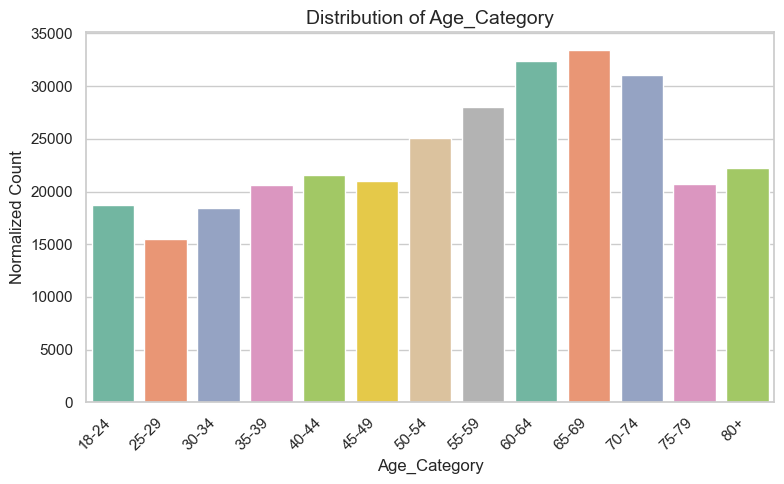

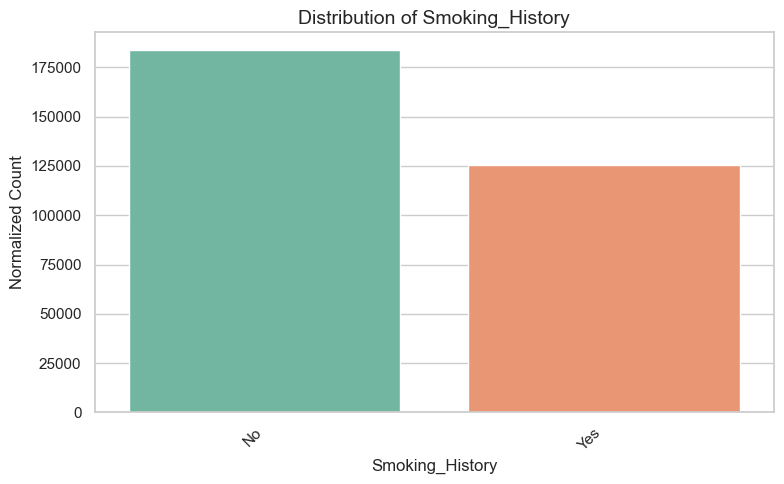

In [94]:
# get some descriptive statistics of all categroical features
allCatColumns = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History']
ageCategoryOrder = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54','55-59','60-64', '65-69','70-74','75-79', '80+']

for column in allCatColumns:
    print(data[column].value_counts(normalize = True))


for column in allCatColumns:
    plt.figure(figsize=(8, 5))
    
    # Get the normalized value counts
    normalized_counts = data[column].value_counts(normalize=True)

    if column == 'Age_Category':
        sns.countplot(x=data[column], palette='Set2', order=ageCategoryOrder)
    else:
        sns.countplot(x=data[column], palette='Set2', order=data[column].value_counts(normalize=True).index)

    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Normalized Count', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


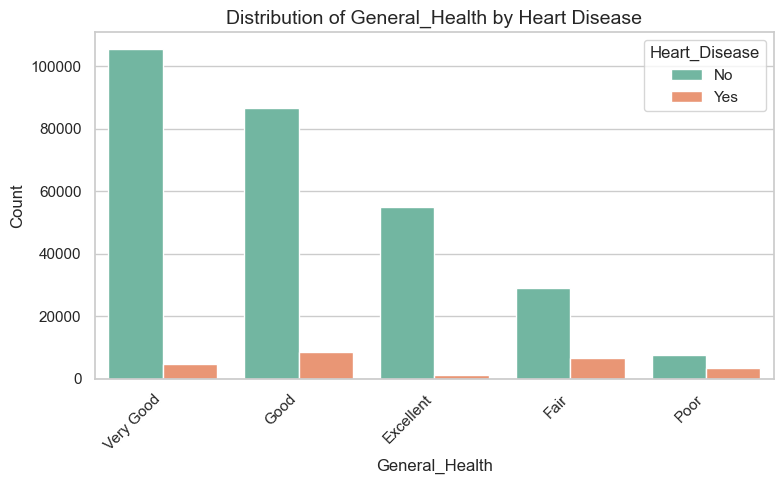

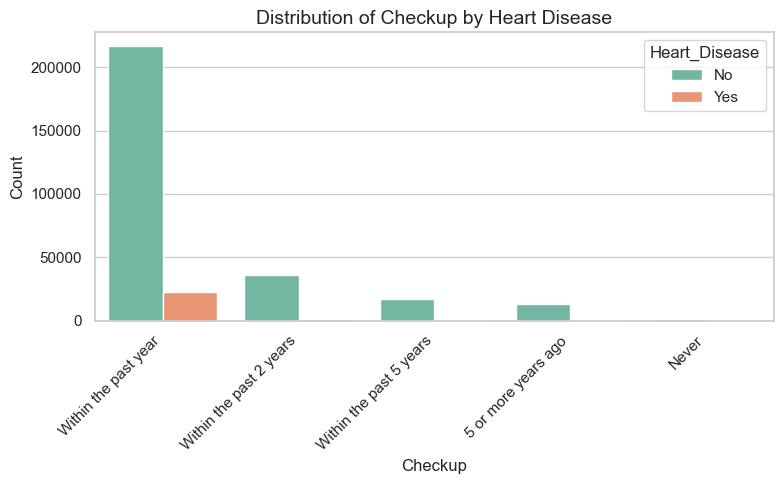

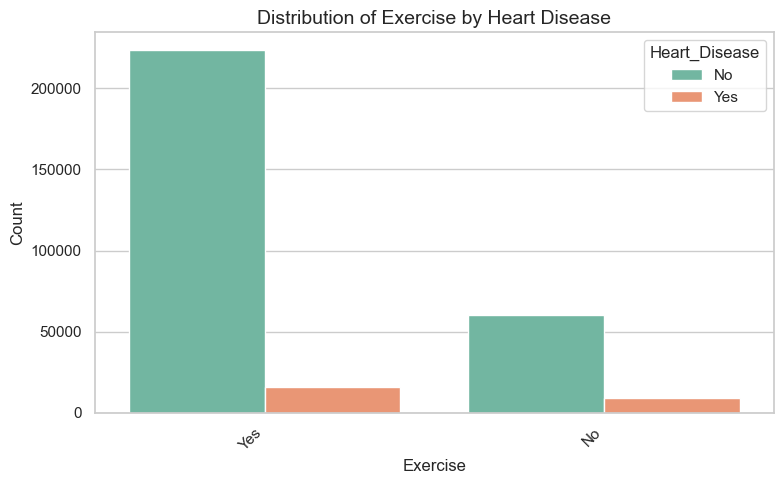

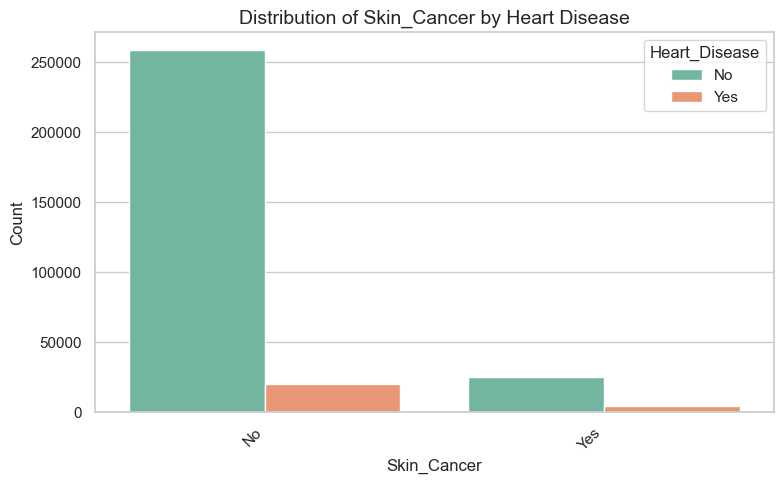

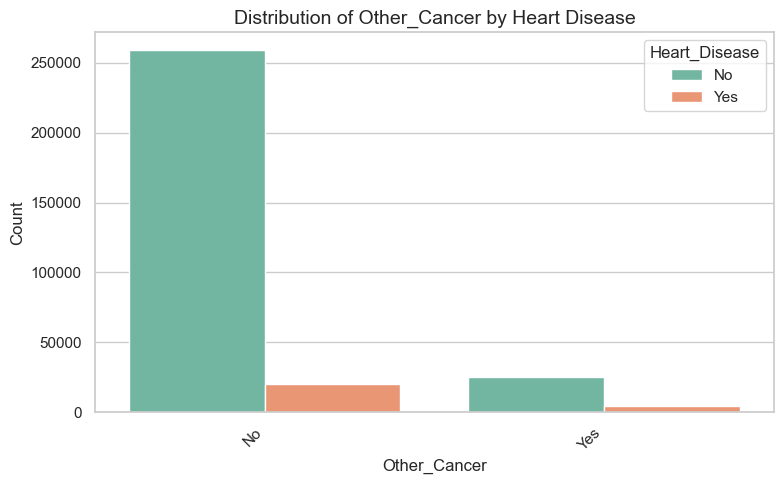

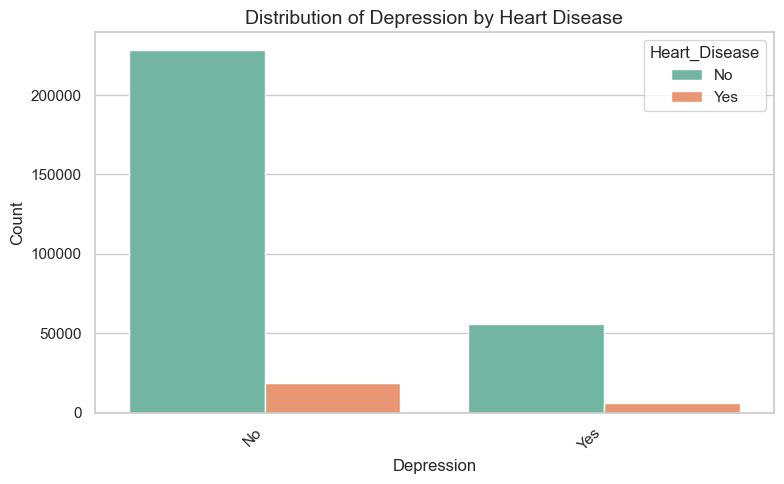

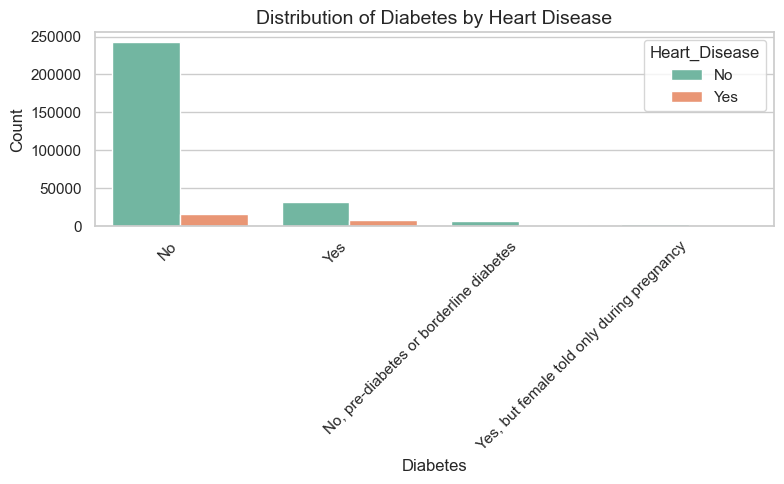

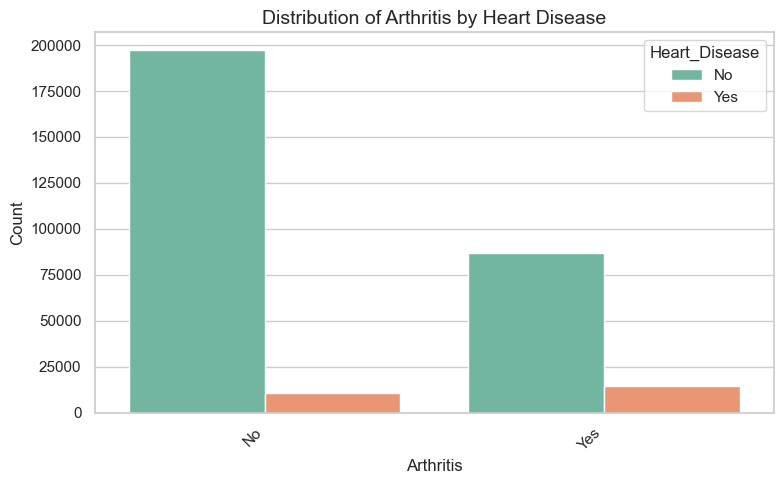

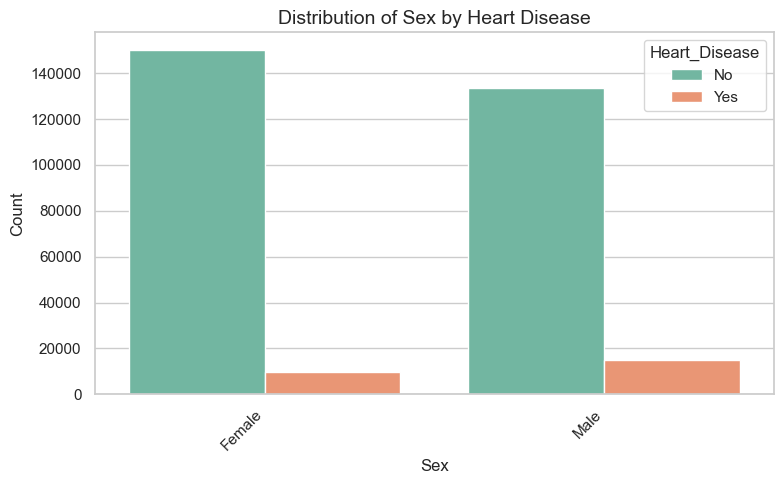

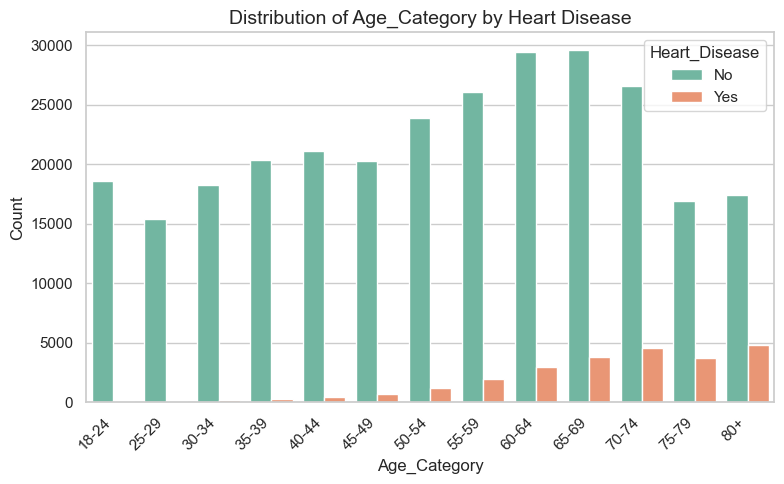

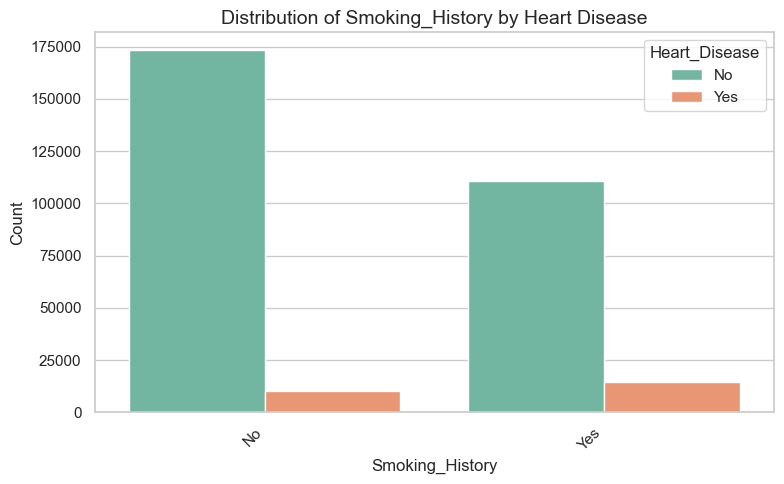

In [95]:
# Set the plotting style
sns.set(style="whitegrid")

allCatColumnsWithoutHeartDisease =  ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History']
# Iterate through each categorical column
for column in allCatColumnsWithoutHeartDisease:
    plt.figure(figsize=(8, 5))
    
    if column == 'Age_Category':
        # Use 'hue' to split by 'Heart_Disease'
        sns.countplot(x=data[column], palette='Set2', order=ageCategoryOrder, hue=data['Heart_Disease'])
    else:
        sns.countplot(x=data[column], palette='Set2', order=data[column].value_counts().index, hue=data['Heart_Disease'])
    
    # Add title and labels
    plt.title(f'Distribution of {column} by Heart Disease', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Show the plot
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


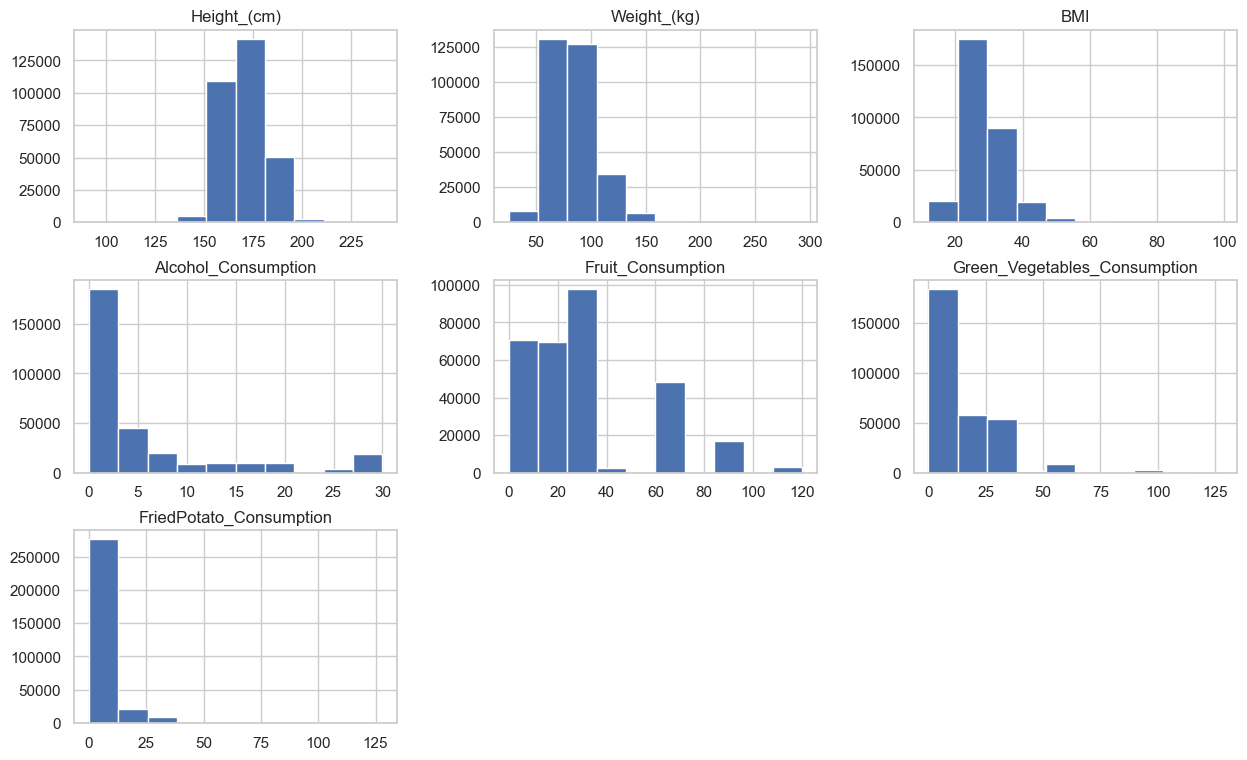

In [96]:
# descriptive statistics for numerical columns
allNumColumns = ['Height_(cm)', 'Weight_(kg)', 'BMI',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

data.hist(figsize = (15,9))
plt.show()

### What do we see?

Overall, many features are not close to normally distributed, instead they are heavily skewed (e.g. Checkup), leaving it questionable if they hav a great predictive power.

The target feature "Heart_Disease" is also really skewed, having a baseline of 92% of people that do not have a heart disease. Even though that is great for people's health, it makes it really difficult for our algorithms to find good predictive policies. 

We can already see that some attributes (sex, age_category, smoking_history,...) have noticeably different distributions for the subpopulation with and without heart disease, leading us to the conclusion that they could play important roles as predictors in the coming machine learnign tasks.

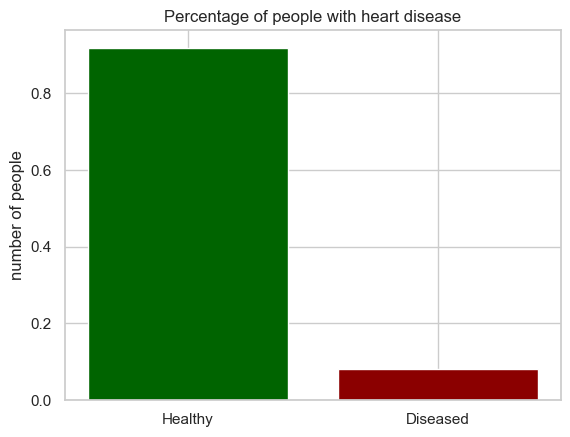

In [97]:
healthy, diseased = data["Heart_Disease"].value_counts(normalize = True)
fig, ax = plt.subplots()
ax.bar(["Healthy", "Diseased"], [healthy, diseased], color = ["darkgreen", "darkred"])
ax.set_ylabel("number of people")
ax.set_title("Percentage of people with heart disease")
plt.show()


Checkup
Within the past year       0.775030
Within the past 2 years    0.120487
Within the past 5 years    0.056473
5 or more years ago        0.043454
Never                      0.004556
Name: proportion, dtype: float64


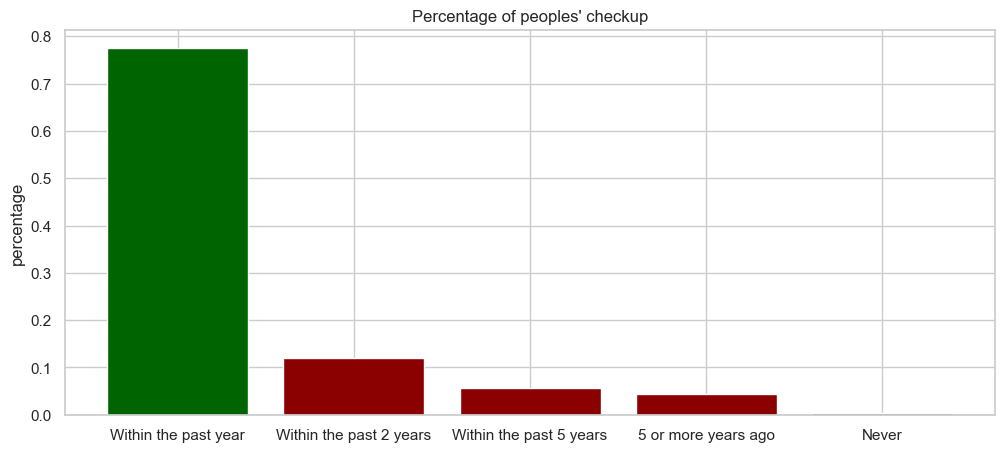

In [98]:
print(data["Checkup"].value_counts(normalize = True))
one, two, three, four, five = data["Checkup"].value_counts(normalize = True)
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(["Within the past year", "Within the past 2 years", "Within the past 5 years", "5 or more years ago", "Never"], [one, two, three, four, five], color = ["darkgreen", "darkred", "darkred", "darkred", "darkred"])
ax.set_ylabel("percentage")
ax.set_title("Percentage of peoples' checkup")
plt.show()

In [99]:
data.groupby("Heart_Disease")["Sex"].value_counts(normalize = True)

Heart_Disease  Sex   
No             Female    0.529436
               Male      0.470564
Yes            Male      0.603620
               Female    0.396380
Name: proportion, dtype: float64

In [100]:
data.groupby("Heart_Disease")["Checkup"].value_counts(normalize = True)

Heart_Disease  Checkup                
No             Within the past year       0.763469
               Within the past 2 years    0.125925
               Within the past 5 years    0.059782
               5 or more years ago        0.046072
               Never                      0.004752
Yes            Within the past year       0.906451
               Within the past 2 years    0.058668
               Within the past 5 years    0.018862
               5 or more years ago        0.013696
               Never                      0.002323
Name: proportion, dtype: float64

In [101]:
data.groupby("Heart_Disease")["General_Health"].value_counts(normalize = True)

Heart_Disease  General_Health
No             Very Good         0.371889
               Good              0.305481
               Excellent         0.193175
               Fair              0.102229
               Poor              0.027226
Yes            Good              0.346122
               Fair              0.271875
               Very Good         0.193104
               Poor              0.144247
               Excellent         0.044652
Name: proportion, dtype: float64

In [102]:
data.groupby("Heart_Disease")["Age_Category"].value_counts(normalize = True)

Heart_Disease  Age_Category
No             65-69           0.104307
               60-64           0.103585
               70-74           0.093496
               55-59           0.091809
               50-54           0.084246
               40-44           0.074538
               35-39           0.071621
               45-49           0.071473
               18-24           0.065474
               30-34           0.064206
               80+             0.061346
               75-79           0.059718
               25-29           0.054181
Yes            80+             0.194466
               70-74           0.182652
               65-69           0.153098
               75-79           0.150254
               60-64           0.120620
               55-59           0.079732
               50-54           0.047295
               45-49           0.027151
               40-44           0.017420
               35-39           0.010973
               30-34           0.008049
            

### Preprocessing and cleaning - Convert all features to numeric

In [103]:
# clean data 
cleaned_data = data.copy()
yes_no_categories = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History'] #convert yes/no categories to integers
for i in yes_no_categories:
    cleaned_data[i] = np.where(data[i].str.startswith('Yes', na=False), 1, data[i])
    cleaned_data[i] = np.where(data[i].str.startswith('No', na=False), 0, cleaned_data[i])
    cleaned_data[i] = cleaned_data[i].astype(int)
#cleaned_data
cleaned_data['Sex'].unique() # convert sex to binary integers
cleaned_data['Sex'] = np.where(data['Sex'] == 'Male', 0, 1)
cleaned_data['Sex'] == cleaned_data['Sex'].astype(int)

#age_categories = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','80+']

cleaned_data['Age_Category'].unique() # convert age categories to their mean values
cleaned_data['Age_Category'] = np.where(data['Age_Category'] == '18-24', 21, data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '25-29', 27, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '30-34', 32, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '35-39', 37, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '40-44', 42, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '45-49', 47, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '50-54', 52, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '55-59', 57, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '60-64', 62, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '65-69', 67, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '70-74', 72, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '75-79', 77, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '80+', 82, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = cleaned_data['Age_Category'].astype(int)

cleaned_data['General_Health'].unique() # discretize general health
cleaned_data['General_Health'] = np.where(data['General_Health'] == 'Poor', 1, data['General_Health'])
cleaned_data['General_Health'] = np.where(cleaned_data['General_Health'] == 'Fair', 2, cleaned_data['General_Health'])
cleaned_data['General_Health'] = np.where(cleaned_data['General_Health'] == 'Good', 3, cleaned_data['General_Health'])
cleaned_data['General_Health'] = np.where(cleaned_data['General_Health'] == 'Very Good', 4, cleaned_data['General_Health'])
cleaned_data['General_Health'] = np.where(cleaned_data['General_Health'] == 'Excellent', 5, cleaned_data['General_Health'])
cleaned_data['General_Health'] = cleaned_data['General_Health'].astype(int)

# discretize checkup category
cleaned_data['Checkup'].unique()
cleaned_data['Checkup'] = np.where(data['Checkup'] == 'Never', 1, data['Checkup'])
cleaned_data['Checkup'] = np.where(data['Checkup'] == '5 or more years ago', 2, cleaned_data['Checkup'])
cleaned_data['Checkup'] = np.where(data['Checkup'] == 'Within the past 5 years', 3, cleaned_data['Checkup'])
cleaned_data['Checkup'] = np.where(data['Checkup'] == 'Within the past 2 years', 4, cleaned_data['Checkup'])
cleaned_data['Checkup'] = np.where(data['Checkup'] == 'Within the past year', 5, cleaned_data['Checkup'])
cleaned_data['Checkup'] = cleaned_data['Checkup'].astype(int)

#cleaned_data.dtypes
#cleaned_data


### Correlations

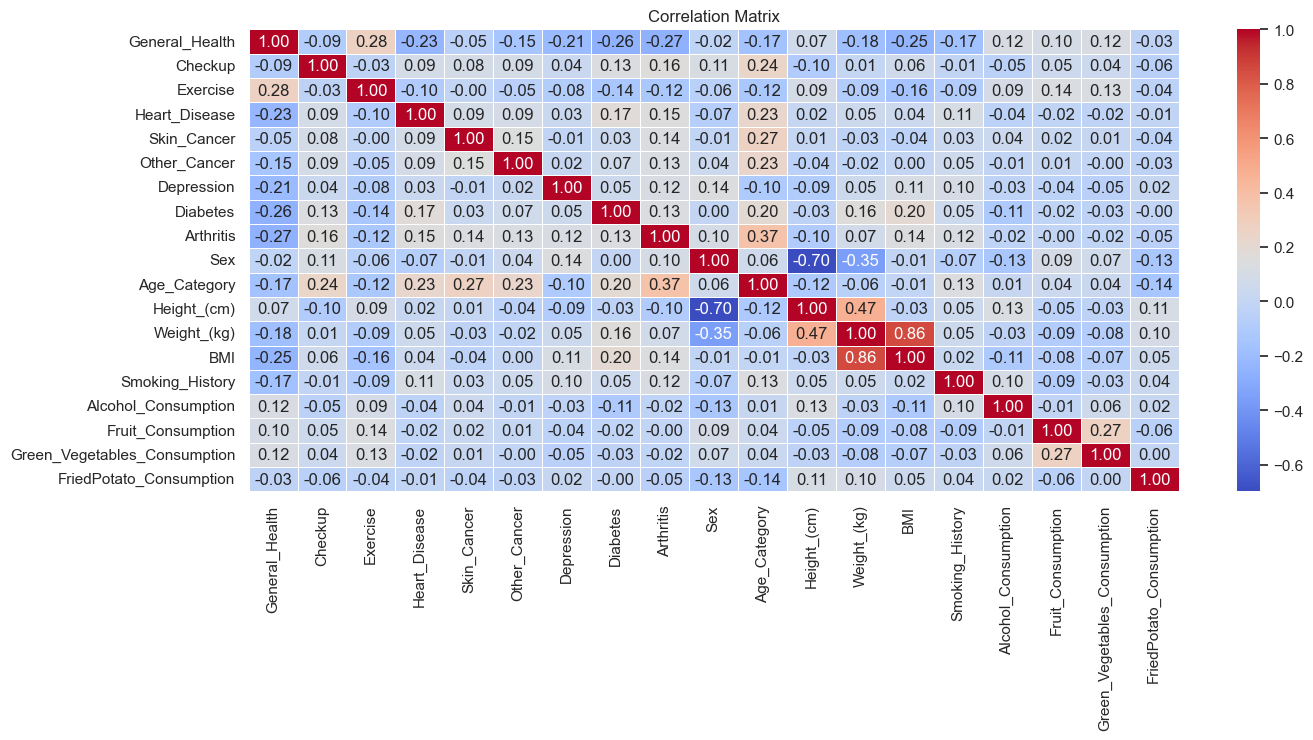

In [104]:
# show correlation matric
correlation_matrix = cleaned_data.corr()
plt.figure(figsize=(15, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### What do we see?

In general the different features do not correlate badly with each other, with some exceptions:
- Sex and height as well as sex and weight naturally correlate quite highly.
- Weight, height and the BMI of a person have a really high correlation. This is logical, since in the formula that determines the BMI, weight and height are both used.
- Exercise correlates with general health (probably they even are causes of the other, could work in both directions)
- fruit and vegetable consumption correlate positively (probably both influenced by a third variable "healthy diet")

Overall, all of the correlations between features are in line with common sense. We will keep the correlations and their possible consequences in mind for our anaylses.


### Group and summarise data

In [105]:
summariesGrouped = cleaned_data.groupby("Heart_Disease").agg(["mean", "std"])
summariesGrouped

General_Health             Checkup            Exercise  \
                        mean       std      mean       std      mean   
Heart_Disease                                                          
0                   3.601558  0.996921  4.597288  0.832800  0.786993   
1                   2.722038  1.069279  4.853230  0.522505  0.639422   

                        Skin_Cancer           Other_Cancer            ...  \
                    std        mean       std         mean       std  ...   
Heart_Disease                                                         ...   
0              0.409433    0.089135  0.284939     0.088639  0.284222  ...   
1              0.480178    0.187818  0.390574     0.188819  0.391373  ...   

              Smoking_History           Alcohol_Consumption            \
                         mean       std                mean       std   
Heart_Disease                                                           
0                    0.389879  0.487723            5.185298  8.198700   
1                    0.584037  0.492897            4.085339  8.143996   

              Fruit_Consumption            Green_Vegetables_Consumption  \
                           mean        std                         mean   
Heart_Disease                                                             
0                     29.983159  24.908340                    15.216878   
1                     28.153138  24.439608                    13.900404   

                         FriedPotato_Consumption            
                     std                    mean       std  
Heart_Disease                                               
0              15.003458                6.320104  8.589234  
1              13.961847                6.029594  8.506845  

[2 rows x 36 columns]

In [106]:
# scale data for comparability
checkData = cleaned_data.copy()
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(checkData.drop(columns=["Heart_Disease"])), 
                           columns=checkData.drop(columns=["Heart_Disease"]).columns)

# Add the target variable back to the DataFrame
scaled_data["Heart_Disease"] = checkData["Heart_Disease"].reset_index(drop=True)

summariesGrouped = scaled_data.groupby("Heart_Disease").agg(["mean"])
summariesGrouped

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Heart_Disease,,,,,,,,,,,,,,,,,,
0,0.068957,-0.025386,0.028575,-0.026944,-0.027401,-0.009647,-0.051073,-0.045648,0.021530,-0.067768,-0.004680,-0.013606,-0.012654,-0.031971,0.010846,0.005948,0.007131,0.002737
1,-0.783934,0.288606,-0.324855,0.306316,0.311504,0.109668,0.580624,0.518953,-0.244769,0.770421,0.053207,0.154679,0.143859,0.363461,-0.123300,-0.067619,-0.081068,-0.031111


In [107]:
pValues = {}
for feature in cleaned_data.columns:
    if feature != "Heart_Disease":
        group0 = cleaned_data[cleaned_data["Heart_Disease"] == 0][feature]
        group1 = cleaned_data[cleaned_data["Heart_Disease"] == 1][feature]

        t_stat, p_value = stats.ttest_ind(group0, group1)
        pValues[feature] = round(p_value, 4)

pValues

{'General_Health': 0.0,
 'Checkup': 0.0,
 'Exercise': 0.0,
 'Skin_Cancer': 0.0,
 'Other_Cancer': 0.0,
 'Depression': 0.0,
 'Diabetes': 0.0,
 'Arthritis': 0.0,
 'Sex': 0.0,
 'Age_Category': 0.0,
 'Height_(cm)': 0.0,
 'Weight_(kg)': 0.0,
 'BMI': 0.0,
 'Smoking_History': 0.0,
 'Alcohol_Consumption': 0.0,
 'Fruit_Consumption': 0.0,
 'Green_Vegetables_Consumption': 0.0,
 'FriedPotato_Consumption': 0.0}

In [108]:
# Define features (X) and target (y)
X = cleaned_data.drop(columns=['Heart_Disease'])  # All columns except 'Heart Disease'
y = cleaned_data['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=500, random_state=42)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9188080771015682
Confusion Matrix:
 [[84649   452]
 [ 7071   485]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     85101
           1       0.52      0.06      0.11      7556

    accuracy                           0.92     92657
   macro avg       0.72      0.53      0.54     92657
weighted avg       0.89      0.92      0.89     92657



In [109]:
# Add an intercept column to the data
X_with_intercept = sm.add_constant(X)

# Fit a logistic regression model using statsmodels
logit_model = sm.Logit(y, X_with_intercept)
result = logit_model.fit()

# Get the summary of the model, which includes p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.221905
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:               308854
Model:                          Logit   Df Residuals:                   308835
Method:                           MLE   Df Model:                           18
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                  0.2099
Time:                        20:25:14   Log-Likelihood:                -68536.
converged:                       True   LL-Null:                       -86739.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -4.2351      0.488     -8.677      0.000

### What does the regression show?

Almost all features correlate significantly with heart disease, all correlations as expected. 

Not to confuse causality with correlation (e.g. Checkup)

In [110]:
# save preprocessed data
cleaned_data.to_csv('data/preprocessedData.csv', index=False)

### Reducing Data Dimensions

Reasoning: Reducing features manually leads to easier analsyses. We aim to find a good balance between reducing the dimensions as far as possible but not loosing a lot of information.

We saw that height and weight correlate highly with another and with BMI (and also sex). Since this will introduce multi-collinearity, we are deleting weight and height from our reduced data set. The formular to calculate a persons BMI is: BMI = kg/m^2. We will hence, consider both metrics even if we delete them.

Since ourgoal is to analyse the data in a way that we find comprehensive and actionable predictions and clusters, we must be able to understand the features which we are considering. For the three variables: "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption" we could not find a comprehensive explanation what the numbers really mean. If we now received any results of "FriedPotato_Consumption">= 10, we could not do anything with it, therefore we delete those three categories as well. Alcohol, also not interpretable!

Also, Checkup, bescuase almost all "Within last Year"
Als, Age because correlates highly with atritis.


In [111]:
cleaned_data.columns

ReducedColumns = ['General_Health', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
        'BMI', 'Smoking_History']

reducedData = cleaned_data[ReducedColumns]
reducedData
reducedData.to_csv('data/reducedData.csv', index=False)

### Dealing with the skewed baseline of heart disease

As mentioned above, a big problem for the coming analyses is the fact that the baseline of not having heart disease in the data set is 92%.

We will of course use the original data set in our analyses but to check if some results can simply be explained by the skewed distribution, we will also build a balanced data set where the probability for heart disease is 50%.

In [112]:
subsetWithHeartDisease = cleaned_data[cleaned_data['Heart_Disease'] == 1]
subsetWithoutHeartDisease = cleaned_data[cleaned_data['Heart_Disease'] == 0]

sampleSubsetWithHeartDisease = subsetWithHeartDisease.sample(n=1000, random_state=42)
sampleSubsetWithoutHeartDisease = subsetWithoutHeartDisease.sample(n=1000, random_state=42)
balancedData = pd.concat([sampleSubsetWithHeartDisease, sampleSubsetWithoutHeartDisease], axis=0, ignore_index=True)
balancedData.to_csv('data/balancedData.csv', index=False)

### Discretising values

Even though many algorithm can only be run on numeric values, we understand that for the people who apply the machine learning techniques and use the results for actionable interpretations discretisied variables can be a lot easier and more strait forward to understand.

Hence, we will apply some disctretisations to a discretised version of our data set and try to interpret the differences in results and also search for easily interpretable rules.

- age_category: only three age categoris: "young" = 1 (to 40), "medium" = 2 (to 60), "old" = 3 
- General_Health: three General_Health categoris: "Good" = 3 ("very good" and "excellent"), "medium" = 2 ("good"), "poor" = 1 ("poor" and "fair")
- Checkup: Checkup in the last year? "Yes" = 1, "No" = 0
- Alcohol_Consumption: "none" (33%) = 0, "a little" (66% up to 4) = 1, "a lot" (last 33%) = 2
- BMI: following the official standards: "underweight = 0 (up to 18.5), "normal" = 1 (18.5-24.9), "overweight" = 2 (25-29.9), "obese" = 3 (30+)
- Height: "small" (33%, up to 165) = 0, "medium" (66% up to 175) = 1, "tall" (last 33% from 175) = 2
- Weight:  "light" (33%, up 73) = 0, "medium" (66%, up to 90) = 1, "heavy" (last 33%, from 90) = 2
- Fruit_Consumption: "little" (33%, up to 15) = 0, "medium" (66% up to 30) = 1, "much" (last 33% from 30) = 2
- Green_Vegetables_Consumption: "little" (33%, up to 8) = 0, "medium" (66% up to 16) = 1, "much" (last 33% from 16) = 2
- FriedPotato_Consumption: "little" (33%, up to 2) = 0, "medium" (66% up to 6) = 1, "much" (last 33% from 6) = 2

In [113]:
# clean data 
discretised_data = data.copy()
yes_no_categories = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History'] #convert yes/no categories to integers
for i in yes_no_categories:
    discretised_data[i] = np.where(data[i].str.startswith('Yes', na=False), 1, data[i])
    discretised_data[i] = np.where(data[i].str.startswith('No', na=False), 0, discretised_data[i])
    discretised_data[i] = discretised_data[i].astype(int)
#discretised_data
discretised_data['Sex'].unique() # convert sex to binary integers
discretised_data['Sex'] = np.where(data['Sex'] == 'Male', 0, 1)
discretised_data['Sex'] == discretised_data['Sex'].astype(int)

#age_categories = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','80+']

discretised_data['Age_Category'].unique() # convert age categories to their mean values
discretised_data['Age_Category'] = np.where(data['Age_Category'] == '18-24', 1, data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '25-29', 1, discretised_data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '30-34', 1, discretised_data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '35-39', 1, discretised_data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '40-44', 2, discretised_data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '45-49', 2, discretised_data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '50-54', 2, discretised_data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '55-59', 2, discretised_data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '60-64', 3, discretised_data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '65-69', 3, discretised_data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '70-74', 3, discretised_data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '75-79', 3, discretised_data['Age_Category'])
discretised_data['Age_Category'] = np.where(discretised_data['Age_Category'] == '80+', 3, discretised_data['Age_Category'])
discretised_data['Age_Category'] = discretised_data['Age_Category'].astype(int)

discretised_data['General_Health'].unique() # discretize general health
discretised_data['General_Health'] = np.where(data['General_Health'] == 'Poor', 1, data['General_Health'])
discretised_data['General_Health'] = np.where(discretised_data['General_Health'] == 'Fair', 2, discretised_data['General_Health'])
discretised_data['General_Health'] = np.where(discretised_data['General_Health'] == 'Good', 3, discretised_data['General_Health'])
discretised_data['General_Health'] = np.where(discretised_data['General_Health'] == 'Very Good', 4, discretised_data['General_Health'])
discretised_data['General_Health'] = np.where(discretised_data['General_Health'] == 'Excellent', 5, discretised_data['General_Health'])
discretised_data['General_Health'] = discretised_data['General_Health'].astype(int)

# discretize checkup category
discretised_data['Checkup'].unique()
discretised_data['Checkup'] = np.where(data['Checkup'] == 'Never', 0, data['Checkup'])
discretised_data['Checkup'] = np.where(data['Checkup'] == '5 or more years ago', 0, discretised_data['Checkup'])
discretised_data['Checkup'] = np.where(data['Checkup'] == 'Within the past 5 years', 0, discretised_data['Checkup'])
discretised_data['Checkup'] = np.where(data['Checkup'] == 'Within the past 2 years', 0, discretised_data['Checkup'])
discretised_data['Checkup'] = np.where(data['Checkup'] == 'Within the past year', 1, discretised_data['Checkup'])
discretised_data['Checkup'] = discretised_data['Checkup'].astype(int)

# discretise numeric variables
conditions = [(data['Alcohol_Consumption'] <= 0), (data['Alcohol_Consumption'] > 0) & (data['Alcohol_Consumption'] <= 4), (data['Alcohol_Consumption'] > 4)]
values = [0, 1, 2]
discretised_data['Alcohol_Consumption'] = np.select(conditions, values)

conditions = [(data['BMI'] <= 18.5), (data['BMI'] > 18.5) & (data['BMI'] <= 24.9), (data['BMI'] >= 25) & (data['BMI'] <= 29.9),  (data['BMI'] >= 30)]
values = [0, 1, 2, 3]
discretised_data['BMI'] = np.select(conditions, values)

conditions = [(data['Height_(cm)'] < 165), (data['Height_(cm)'] >= 165) & (data['Height_(cm)'] < 175), (data['Height_(cm)'] >= 175)]
values = [0, 1, 2]
discretised_data['Height_(cm)'] = np.select(conditions, values)

conditions = [(data['Weight_(kg)'] < 73), (data['Weight_(kg)'] >= 73) & (data['Weight_(kg)'] < 90), (data['Weight_(kg)'] >= 90)]
values = [0, 1, 2]
discretised_data['Weight_(kg)'] = np.select(conditions, values)

conditions = [(data['Fruit_Consumption'] < 15), (data['Fruit_Consumption'] >= 15) & (data['Fruit_Consumption'] < 30), (data['Fruit_Consumption'] >= 30)]
values = [0, 1, 2]
discretised_data['Fruit_Consumption'] = np.select(conditions, values)

conditions = [(data['Green_Vegetables_Consumption'] < 8), (data['Green_Vegetables_Consumption'] >= 8) & (data['Green_Vegetables_Consumption'] < 16), (data['Green_Vegetables_Consumption'] >= 16)]
values = [0, 1, 2]
discretised_data['Green_Vegetables_Consumption'] = np.select(conditions, values)

conditions = [(data['FriedPotato_Consumption'] < 2), (data['FriedPotato_Consumption'] >= 2) & (data['FriedPotato_Consumption'] < 6), (data['FriedPotato_Consumption'] >= 6)]
values = [0, 1, 2]
discretised_data['FriedPotato_Consumption'] = np.select(conditions, values)

discretised_data


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,0,0,0,0,0,0,0,1,1,3,0,0,0,1,0,2,2,2
1,4,1,0,1,0,0,0,1,0,1,3,1,1,2,0,0,2,0,1
2,4,1,1,0,0,0,0,1,0,1,3,0,1,3,0,1,0,0,2
3,1,1,1,1,0,0,0,1,0,0,3,2,2,2,0,0,2,2,2
4,3,1,0,0,0,0,0,0,0,0,3,2,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,1,0,0,0,0,0,0,0,1,1,1,2,0,1,2,1,0
308850,2,0,1,0,0,0,0,1,0,0,3,2,0,1,0,2,1,2,1
308851,4,0,1,0,0,0,1,1,0,1,1,0,0,1,1,1,2,1,1
308852,4,1,1,0,0,0,0,0,0,0,3,2,1,1,0,1,2,1,0


In [114]:
discretised_data.to_csv('data/discretisedData.csv', index=False)

### Adding missing values
1. in overall data set
2. in balanced data set

In [115]:
def random_feature():
    a = random.randint(0, cleaned_data.shape[0] - 1)
    return a
def random_row():
    a = random.randint(0, cleaned_data.shape[1] - 1)
    if a == 3:
        a = random_row()
    return a



def random_feature_balanced():
    a = random.randint(0, balancedData.shape[0] - 1)
    return a
def random_row_balanced():
    a = random.randint(0, balancedData.shape[1] - 1)
    if a == 3:
        a = random_row()
    return a

In [116]:
random.seed(0)
randomly_removed10 = cleaned_data.copy()
to_remove10 = int(0.1*randomly_removed10.shape[0]*randomly_removed10.shape[1])
iterations = 0
while iterations < to_remove10:
    rf = random_feature()
    #print(rf)
    rr = random_row()
    #print(rr)
    if randomly_removed10.iloc[rf, rr] != np.nan:
        iterations +=1
        if iterations % 1000 == 0:
            print(to_remove10 - iterations)
        #print(to_remove10 - iterations)
        randomly_removed10.iloc[rf, rr] = np.nan
    else:
        pass

randomly_removed10
    

585822
584822
583822
582822
581822
580822
579822
578822
577822
576822
575822
574822
573822
572822
571822
570822
569822
568822
567822
566822
565822
564822
563822
562822
561822
560822
559822
558822
557822
556822
555822
554822
553822
552822
551822
550822
549822
548822
547822
546822
545822
544822
543822
542822
541822
540822
539822
538822
537822
536822
535822
534822
533822
532822
531822
530822
529822
528822
527822
526822
525822
524822
523822
522822
521822
520822
519822
518822
517822
516822
515822
514822
513822
512822
511822
510822
509822
508822
507822
506822
505822
504822
503822
502822
501822
500822
499822
498822
497822
496822
495822
494822
493822
492822
491822
490822
489822
488822
487822
486822
485822
484822
483822
482822
481822
480822
479822
478822
477822
476822
475822
474822
473822
472822
471822
470822
469822
468822
467822
466822
465822
464822
463822
462822
461822
460822
459822
458822
457822
456822
455822
454822
453822
452822
451822
450822
449822
448822
447822
446822
445822
444822
443822

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1.0,4.0,0.0,0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,4.0,5.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0,72.0,165.0,77.11,NaN,0.0,0.0,NaN,0.0,4.0
2,4.0,5.0,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,62.0,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,1.0,5.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,77.0,NaN,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,3.0,5.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,191.0,88.45,NaN,NaN,0.0,8.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4.0,5.0,1.0,0,0.0,NaN,0.0,0.0,0.0,0.0,27.0,168.0,81.65,29.05,0.0,NaN,30.0,8.0,0.0
308850,2.0,3.0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,180.0,69.85,21.48,NaN,NaN,15.0,NaN,4.0
308851,4.0,2.0,1.0,0,0.0,0.0,1.0,1.0,0.0,1.0,32.0,157.0,61.23,24.69,NaN,NaN,40.0,8.0,4.0
308852,4.0,5.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,NaN,79.38,23.73,0.0,3.0,30.0,12.0,0.0


In [117]:
random.seed(0)
randomly_removed20 = cleaned_data.copy()
to_remove20 = int(0.2*randomly_removed20.shape[0]*randomly_removed20.shape[1])
iterations = 0
while iterations < to_remove20:
    rf = random_feature()
    rr = random_row()
    if randomly_removed20.iloc[rf, rr] != np.nan:
        iterations +=1
        if iterations % 1000 == 0:
            print(to_remove20 - iterations)
        randomly_removed20.iloc[rf, rr] = np.nan
    else:
        pass

randomly_removed20

1172645
1171645
1170645
1169645
1168645
1167645
1166645
1165645
1164645
1163645
1162645
1161645
1160645
1159645
1158645
1157645
1156645
1155645
1154645
1153645
1152645
1151645
1150645
1149645
1148645
1147645
1146645
1145645
1144645
1143645
1142645
1141645
1140645
1139645
1138645
1137645
1136645
1135645
1134645
1133645
1132645
1131645
1130645
1129645
1128645
1127645
1126645
1125645
1124645
1123645
1122645
1121645
1120645
1119645
1118645
1117645
1116645
1115645
1114645
1113645
1112645
1111645
1110645
1109645
1108645
1107645
1106645
1105645
1104645
1103645
1102645
1101645
1100645
1099645
1098645
1097645
1096645
1095645
1094645
1093645
1092645
1091645
1090645
1089645
1088645
1087645
1086645
1085645
1084645
1083645
1082645
1081645
1080645
1079645
1078645
1077645
1076645
1075645
1074645
1073645
1072645
1071645
1070645
1069645
1068645
1067645
1066645
1065645
1064645
1063645
1062645
1061645
1060645
1059645
1058645
1057645
1056645
1055645
1054645
1053645
1052645
1051645
1050645
1049645
1048645


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1.0,4.0,0.0,0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,150.0,32.66,14.54,1.0,0.0,NaN,16.0,12.0
1,4.0,NaN,0.0,1,0.0,0.0,0.0,NaN,0.0,NaN,72.0,165.0,NaN,NaN,NaN,0.0,NaN,0.0,4.0
2,4.0,5.0,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,62.0,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,1.0,5.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,3.0,5.0,0.0,0,0.0,NaN,NaN,0.0,0.0,0.0,82.0,191.0,88.45,NaN,NaN,0.0,8.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4.0,5.0,1.0,0,0.0,NaN,0.0,0.0,0.0,NaN,27.0,NaN,81.65,29.05,0.0,NaN,30.0,8.0,NaN
308850,NaN,3.0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,180.0,69.85,21.48,NaN,NaN,15.0,NaN,NaN
308851,NaN,2.0,1.0,0,0.0,0.0,1.0,1.0,0.0,1.0,32.0,157.0,61.23,24.69,NaN,NaN,40.0,8.0,4.0
308852,NaN,5.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,NaN,79.38,NaN,0.0,NaN,30.0,12.0,0.0


In [118]:
randomly_removed10.to_csv("data/dataset_10_missing.csv", index=False)
randomly_removed20.to_csv("data/dataset_20_missing.csv", index=False)

In [120]:
# save imputed data sets
imputer = IterativeImputer(random_state=13, max_iter=20) 
imputed_10_missing = imputer.fit_transform(randomly_removed10)
imputed_20_missing = imputer.fit_transform(randomly_removed20)
imputed_10_missing = pd.DataFrame(imputed_10_missing, columns=randomly_removed10.columns, index=randomly_removed10.index)
imputed_20_missing = pd.DataFrame(imputed_20_missing, columns=randomly_removed20.columns, index=randomly_removed20.index)


imputed_10_missing.to_csv("data/imputed_dataset_10_missing.csv", index=False)
imputed_20_missing.to_csv("data/imputed_dataset_20_missing.csv", index=False)


/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [121]:
random.seed(0)
balanced_randomly_removed10 = balancedData.copy()
to_remove10 = int(0.1*balanced_randomly_removed10.shape[0]*balanced_randomly_removed10.shape[1])
iterations = 0
while iterations < to_remove10:
    rf = random_feature_balanced()
    #print(rf)
    rr = random_row_balanced()
    #print(rr)
    if balanced_randomly_removed10.iloc[rf, rr] != np.nan:
        iterations +=1
        if iterations % 1000 == 0:
            print(to_remove10 - iterations)
        #print(to_remove10 - iterations)
        balanced_randomly_removed10.iloc[rf, rr] = np.nan
    else:
        pass

balanced_randomly_removed10
    

2800
1800
800


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3.0,5.0,1.0,1,NaN,0.0,0.0,0.0,NaN,0.0,42.0,185.0,99.79,29.03,0.0,0.0,30.0,30.0,4.0
1,3.0,NaN,1.0,1,0.0,0.0,0.0,1.0,1.0,0.0,67.0,165.0,NaN,33.28,1.0,1.0,15.0,15.0,2.0
2,4.0,4.0,NaN,1,NaN,0.0,0.0,NaN,0.0,1.0,57.0,152.0,68.04,29.29,0.0,0.0,8.0,12.0,3.0
3,1.0,5.0,NaN,1,0.0,0.0,NaN,0.0,1.0,0.0,77.0,170.0,90.72,31.32,1.0,NaN,16.0,8.0,4.0
4,1.0,5.0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,82.0,152.0,42.18,18.16,1.0,0.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.0,5.0,1.0,0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,193.0,108.86,29.21,1.0,0.0,12.0,60.0,NaN
1996,4.0,5.0,1.0,0,0.0,0.0,NaN,0.0,0.0,0.0,21.0,175.0,85.73,NaN,0.0,NaN,0.0,0.0,0.0
1997,4.0,5.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,57.0,193.0,NaN,NaN,1.0,NaN,2.0,20.0,10.0
1998,5.0,5.0,1.0,0,NaN,0.0,0.0,0.0,0.0,1.0,67.0,155.0,58.97,24.56,0.0,0.0,30.0,30.0,NaN


In [122]:
random.seed(0)
balanced_randomly_removed20 = balancedData.copy()
to_remove20 = int(0.2*balanced_randomly_removed20.shape[0]*balanced_randomly_removed20.shape[1])
iterations = 0
while iterations < to_remove20:
    rf = random_feature_balanced()
    rr = random_row_balanced()
    if balanced_randomly_removed20.iloc[rf, rr] != np.nan:
        iterations +=1
        if iterations % 1000 == 0:
            print(to_remove20 - iterations)
        balanced_randomly_removed20.iloc[rf, rr] = np.nan
    else:
        pass

balanced_randomly_removed20

6600
5600
4600
3600
2600
1600
600


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3.0,5.0,1.0,1,NaN,0.0,0.0,0.0,NaN,0.0,42.0,185.0,99.79,NaN,0.0,0.0,30.0,30.0,NaN
1,3.0,NaN,1.0,1,0.0,0.0,0.0,1.0,NaN,0.0,67.0,165.0,NaN,33.28,1.0,1.0,15.0,NaN,2.0
2,4.0,4.0,NaN,1,NaN,0.0,NaN,NaN,0.0,1.0,57.0,152.0,68.04,29.29,0.0,0.0,NaN,12.0,3.0
3,NaN,5.0,NaN,1,0.0,0.0,NaN,0.0,1.0,0.0,77.0,170.0,90.72,31.32,1.0,NaN,16.0,8.0,4.0
4,1.0,5.0,0.0,1,0.0,1.0,0.0,0.0,NaN,NaN,82.0,152.0,42.18,18.16,NaN,0.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.0,5.0,1.0,0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,193.0,108.86,29.21,1.0,0.0,12.0,60.0,NaN
1996,4.0,5.0,1.0,0,0.0,0.0,NaN,0.0,0.0,0.0,21.0,175.0,85.73,NaN,0.0,NaN,0.0,0.0,0.0
1997,4.0,NaN,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,57.0,193.0,NaN,NaN,1.0,NaN,2.0,20.0,10.0
1998,5.0,5.0,1.0,0,NaN,0.0,0.0,0.0,0.0,1.0,67.0,155.0,58.97,24.56,0.0,0.0,30.0,30.0,NaN


In [123]:
balanced_randomly_removed10.to_csv("data/balanced_dataset_10_missing.csv", index=False)
balanced_randomly_removed20.to_csv("data/balanced_dataset_20_missing.csv", index=False)